**HW4: Introduction to Machine Learning**  
Ziyad Zawawi   
PHYS 427 

Machine learning in general helps us make a function that gives us a prediction based on inputs we provide. There are many ways of training a function, in this assignment we are training a function using boosted decision tree, and neural networks. 
Boosted decision trees train by making new trees, each fit on a modified version of the previous tree, starting with the original input and so on. 
A neural network is a another method of training that recognizes patterns from input through a machine perception, labeling or clustering raw input. 

In [2]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [3]:
# Opening files using uproot 
file = uproot.open("df_1.root")
file2 = uproot.open("df_2.root")
file3 = uproot.open("df_3.root")
file4 = uproot.open("df_4.root")
file5 = uproot.open("df_5.root")
file6 = uproot.open("df_6.root")

# Looking at files keys to open the DataFrame
file.keys()
tree1 = file["pandas_tree218"]

#tree.pandas.df()

tree2 = file2["pandas_tree51358"]
tree3 = file3["pandas_tree53278"]
tree4 = file4["pandas_tree52558"]
tree5 = file5["pandas_tree53038"]
tree6 = file6["pandas_tree54718"]

tree1 = tree1.pandas.df()
tree2 = tree2.pandas.df()
tree3 = tree3.pandas.df()
tree4 = tree4.pandas.df()
tree5 = tree5.pandas.df()
tree6 = tree6.pandas.df()

# Making wholetree Dataframe which saves all the trees dataframes together in one
trees = [tree1, tree2, tree3, tree4, tree5, tree6]
wholetree = pd.concat(trees, keys=["tree1", "tree2", "tree3", "tree4", "tree5", "tree6"])
# Printing the wholetree 
wholetree

/Users/zawawi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



EH_CBL0   EH_CBL1   EH_CVL2   EH_EBL0   EH_EBL1  EH_EBL2  \
      entry                                                                
tree1 0        0.000000  0.000000  0.000000  0.019344  0.000731  0.00000   
      1        0.001846  0.007566 -0.000409  0.006951  0.000300  0.00013   
      2        0.000000  0.000000  0.000000  0.004981 -0.000061  0.00000   
      3        0.053559  0.016177 -0.000283  0.000000  0.000000  0.00000   
      4        0.171568  0.171965  0.010581  0.000000  0.000000  0.00000   
...                 ...       ...       ...       ...       ...      ...   
tree6 1695822  0.128465  0.782973  0.010746  0.000000  0.000000  0.00000   
      1695823  0.196844  0.105239  0.005006  0.000000  0.000000  0.00000   
      1695824  0.000000  0.000000  0.000000  0.104669  0.001416  0.00000   
      1695825  0.321571  0.060390  0.000261  0.000000  0.000000  0.00000   
      1695826  0.002808  0.000000  0.000000  0.000000  0.000000  0.00000   

                 EH_EL0    EH_EL1    EH_EL2    EH_EL3  ...       JetPt  \
      entry                                            ...               
tree1 0        0.000807  0.031896  0.844471  0.001827  ...   50.151355   
      1        0.000000  0.000000  0.000000  0.000000  ...   45.315016   
      2        0.208731  0.094806  0.004111  0.000000  ...  163.244844   
      3        0.000000  0.000000  0.000000  0.000000  ...  147.121187   
      4        0.000000  0.000000  0.000000  0.000000  ...   54.661199   
...                 ...       ...       ...       ...  ...         ...   
tree6 1695822  0.000000  0.000000  0.000000  0.000000  ...  216.514703   
      1695823  0.000000  0.000000  0.000000  0.000000  ...  100.025234   
      1695824 -0.000205  0.000000  0.000000  0.000000  ...   88.622664   
      1695825  0.000000  0.000000  0.000000  0.000000  ...   79.377008   
      1695826  0.000000  0.000000  0.000000  0.000000  ...   63.754262   

                   Leta      Lphi            Lpt           Lpz           Lx  \
      entry                                                                   
tree1 0        1.779190  0.095954            NaN           NaN  1851.684326   
      1        0.000000  0.000000            NaN           NaN     0.000000   
      2        1.705462  2.767689            NaN           NaN   609.158691   
      3        0.000000  0.000000            NaN           NaN     0.000000   
      4        0.000000  0.000000            NaN           NaN     0.000000   
...                 ...       ...            ...           ...          ...   
tree6 1695822  0.171292  2.608571  145729.990106  25084.673828  2221.168945   
      1695823  0.000000  0.000000       0.000000      0.000000     0.000000   
      1695824  0.000000  0.000000       0.000000      0.000000     0.000000   
      1695825  0.000000  0.000000       0.000000      0.000000     0.000000   
      1695826  0.000000  0.000000       0.000000      0.000000     0.000000   

                        Ly           Lz  RunNumber  nLLPs_Near_Jets  
      entry                                                          
tree1 0         178.223892  5354.035156   284500.0                1  
      1           0.000000     0.000000   284500.0                0  
      2         239.010056  1741.357788   284500.0                1  
      3           0.000000     0.000000   284500.0                0  
      4           0.000000     0.000000   284500.0                0  
...                    ...          ...        ...              ...  
tree6 1695822  1310.453613   443.914246   310000.0                1  
      1695823     0.000000     0.000000   310000.0                0  
      1695824     0.000000     0.000000   310000.0                0  
      1695825     0.000000     0.000000   310000.0                0  
      1695826     0.000000     0.000000   310000.0                0  

[3448258 rows x 38 columns]

After loading the dataframes in wholetree, I only save the energies that correspond to True IsLLP, then splitting that tree into even and odd entries to train and predict using Boosted Decision Trees and Neural Network function. I also get the transverse decay length to use as another input for my training. 

In [4]:
IsLLP_true = wholetree.loc[wholetree['IsLLP']== True]

odd = IsLLP_true.iloc[1::2]
even = IsLLP_true.iloc[::2]

energies_odd = odd.iloc[:, 0:21]
energies_even= even.iloc[:, 0:21]

Lx_odd = odd["Lx"]
Ly_odd = odd["Ly"]

Lx_even = even["Lx"]
Ly_even = even["Ly"]

Lxy_odd= (np.power(Lx_odd, 2) + np.power(Ly_odd, 2))**0.5
Lxy_even= (np.power(Lx_even, 2) + np.power(Ly_even, 2))**0.5

Training the Boosted Decision Tree which shows to be faster in training than the Neural Network function.
Fitting with the odd events and predicting with the even. 

In [5]:
BDT = tree.DecisionTreeRegressor()
BDT.fit(energies_odd, Lxy_odd)
BDTprediction = BDT.predict(energies_even)

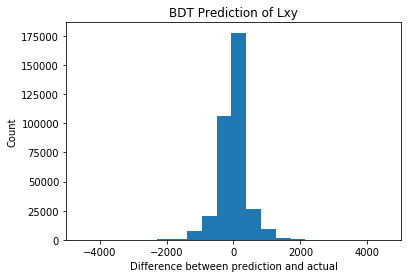

In [6]:
Lxy_delta = BDTprediction - Lxy_even

plt.hist(Lxy_delta,bins = 300)
plt.xlim(-5000, 5000)
plt.title('BDT Prediction of Lxy')
plt.xlabel('Difference between prediction and actual')
plt.ylabel('Count')
plt.show()

Training the neural network function using the odd events and predicting with the evens by limiting the iteration of the regressor since we have around 700000 enteries.

In [7]:
clf = MLPRegressor(hidden_layer_sizes = (22,11))
clf.fit(energies_odd, Lxy_odd)
NN_prediction = clf.predict(energies_even)

/Users/zawawi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


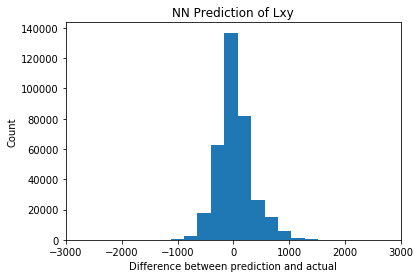

In [8]:
NN_Lxy_delta = NN_prediction - Lxy_even
plt.hist(NN_Lxy_delta, bins = 200)
plt.xlim(-3000, 3000)
plt.title("NN Prediction of Lxy")
plt.xlabel('Difference between prediction and actual')
plt.ylabel('Count')
plt.show()

From a point of view of handling a lot of events, Boosted Decision Tree seems to be better than Neural Network. as a Neural Network would create a lot of tuples and hidden layers that we had to trim to make the training work in shorter time. 

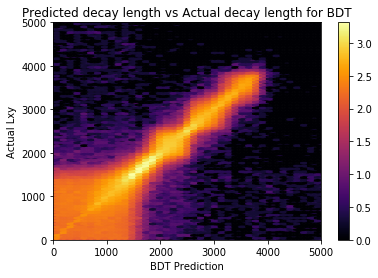

In [9]:
plt.hexbin(x=BDTprediction, y=Lxy_even, bins='log', gridsize=(700,700), cmap='inferno')
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.colorbar()
plt.title("Predicted decay length vs Actual decay length for BDT")
plt.xlabel("BDT Prediction")
plt.ylabel("Actual Lxy")
plt.show()
plt.show()

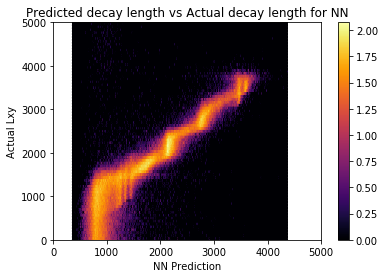

In [10]:
plt.hexbin(x=NN_prediction, y=Lxy_even, bins='log', gridsize = (700,700), cmap='inferno')
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.colorbar()
plt.title("Predicted decay length vs Actual decay length for NN")
plt.xlabel("NN Prediction")
plt.ylabel("Actual Lxy")
plt.show()

Making a dataframe from the jets associated with a False and True IsLLP to determine the performance of the training: 

In [11]:
IsLLP_false = wholetree.loc[wholetree['IsLLP']== False]

IsLLP_false2 = IsLLP_false.iloc[0:500000, :]
IsLLP_false2 = IsLLP_false2.reset_index(drop=True)

TF_tree = pd.concat([IsLLP_true, IsLLP_false2], axis=0)

odd = TF_tree.iloc[1::2]
even = TF_tree.iloc[::2]

energies_odd = odd.iloc[:, 0:21]
energies_even= even.iloc[:, 0:21]

Lx_odd = odd["Lx"]
Ly_odd = odd["Ly"]

Lx_even = even["Lx"]
Ly_even = even["Ly"]

Lxy_odd= (np.power(Lx_odd, 2) + np.power(Ly_odd, 2))**0.5
Lxy_even= (np.power(Lx_even, 2) + np.power(Ly_even, 2))**0.5

In [12]:
BDT2 = tree.DecisionTreeRegressor()
BDT2.fit(energies_odd, Lxy_odd)
BDTprediction_tf = BDT2.predict(energies_even)

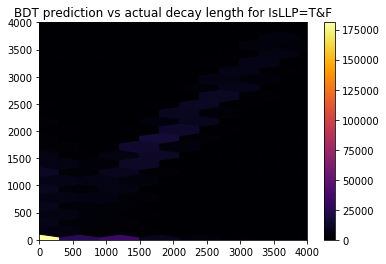

In [13]:
plt.hexbin(x=BDTprediction_tf, y=Lxy_even, gridsize= (150,150), cmap='inferno')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.title('BDT prediction vs actual decay length for IsLLP=T&F')
plt.colorbar()
plt.show()

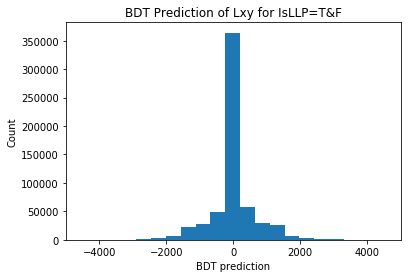

In [14]:
Lxy_delta = BDTprediction_tf - Lxy_even

plt.hist(Lxy_delta,bins = 300)
plt.xlim(-5000, 5000)
plt.title('BDT Prediction of Lxy for IsLLP=T&F')
plt.xlabel('BDT prediction')
plt.ylabel('Count')
plt.show()

Using the dataframe for IsLLP = false to show how the regression does:

In [26]:
odd_f = IsLLP_false2.iloc[1::2]
even_f = IsLLP_false2.iloc[::2]

energies_odd_f = odd_f.iloc[:, 0:21]
energies_even_f = even_f.iloc[:, 0:21]

Lx_odd_f = odd_f["Lx"]
Ly_odd_f = odd_f["Ly"]

Lx_even_f = even_f["Lx"]
Ly_even_f = even_f["Ly"]

Lxy_odd_f = (np.power(Lx_odd_f, 2) + np.power(Ly_odd_f, 2))**0.5
Lxy_even_f= (np.power(Lx_even_f, 2) + np.power(Ly_even_f, 2))**0.5

In [27]:
BDT3 = tree.DecisionTreeRegressor()
BDT3.fit(energies_odd_f, Lxy_odd_f)
BDTprediction_f = BDT3.predict(energies_even_f)

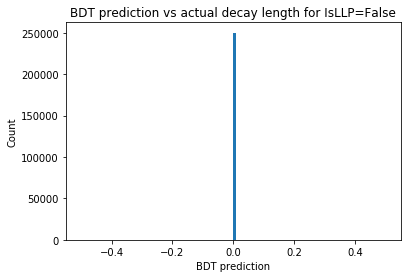

In [40]:
Lxy_delta_f = BDTprediction_f - Lxy_even_f

plt.hist(Lxy_delta_f,bins = 100)
plt.title('BDT prediction vs actual decay length for IsLLP=False')
plt.xlabel('BDT prediction')
plt.ylabel('Count')
plt.show()

As we can see, the regression on the false IsLLP jets shows what we expect; training on a tree that consists of zero values will also predict the same value.